In [1]:
# Titanic Dataset - Exploratory Data Analysis


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [7]:
df = pd.read_csv("C:\\Users\\garik\\Downloads\\Titanic-Dataset.csv")
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(df.describe(include='all'))
print(df.median(numeric_only=True))
print(df.std(numeric_only=True))
print(df.isnull().sum())


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

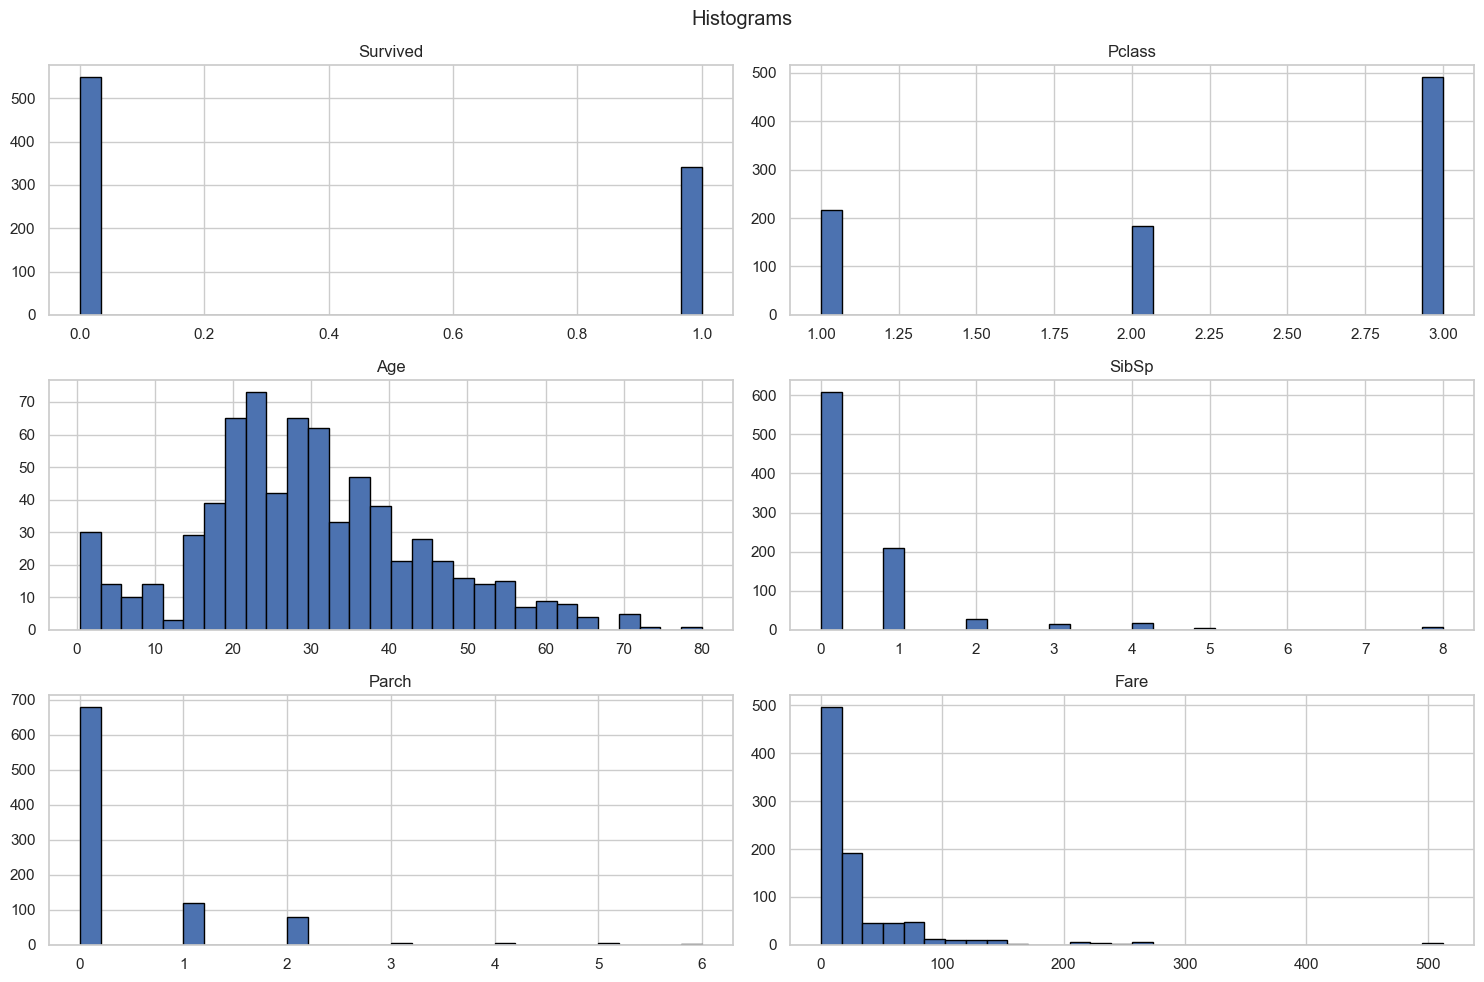

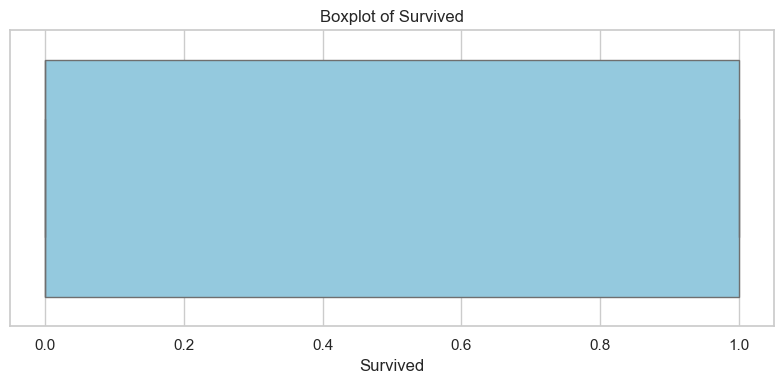

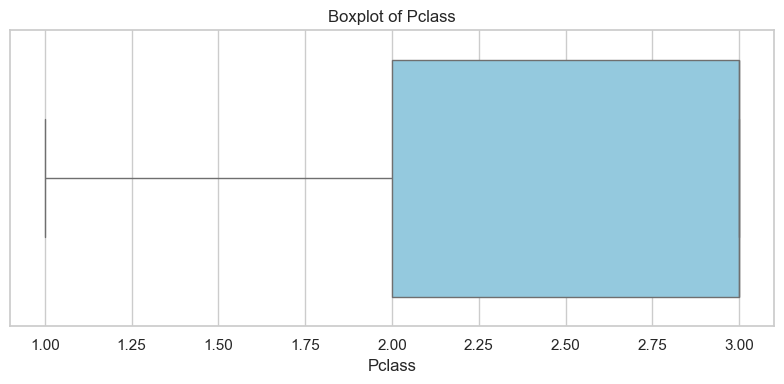

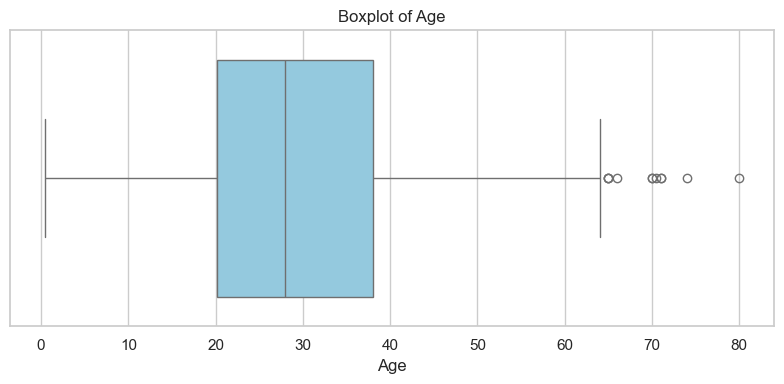

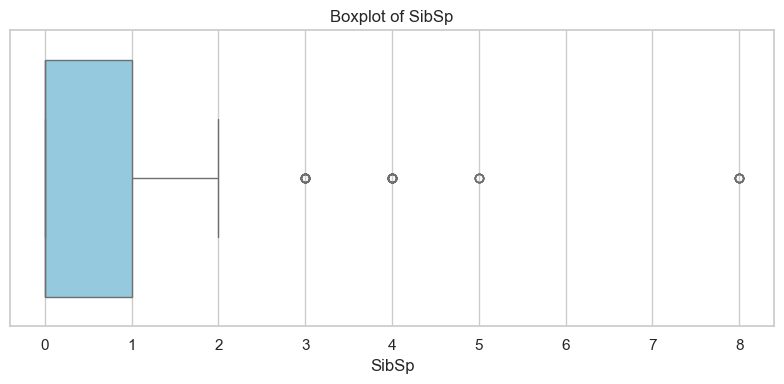

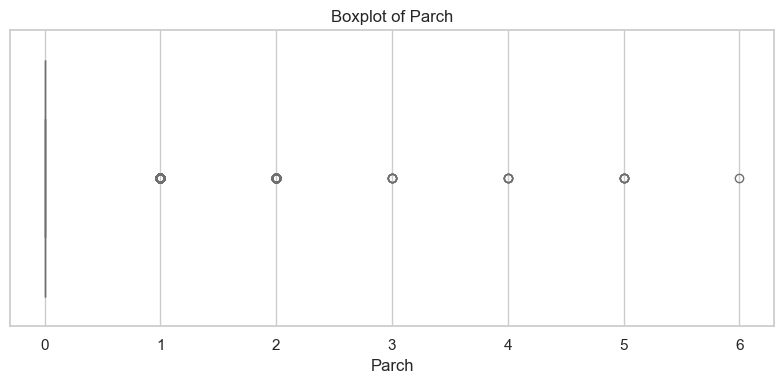

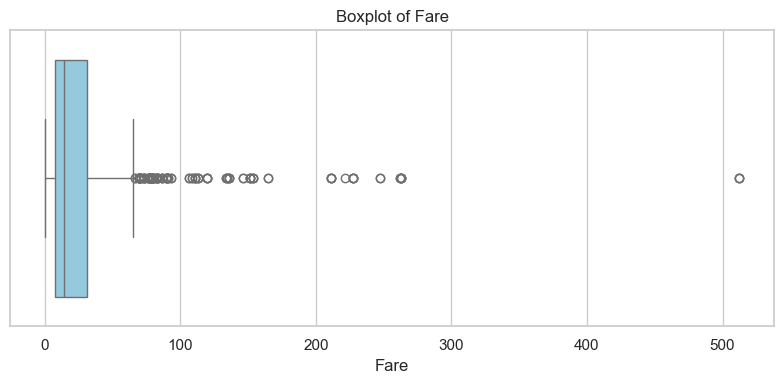

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns
useful_numeric_cols = [
    col for col in numeric_cols
    if df[col].nunique() > 1 and 'id' not in col.lower() and df[col].std() > 0
]

df[useful_numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms")
plt.tight_layout()
plt.show()

for col in useful_numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


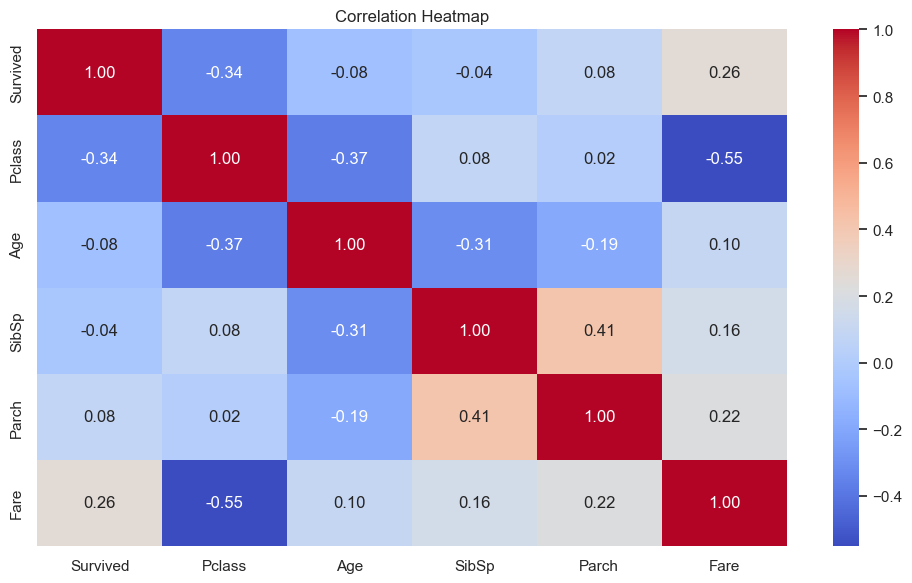

In [18]:
if len(useful_numeric_cols) >= 2:
    corr = df[useful_numeric_cols].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

if 2 <= len(useful_numeric_cols) <= 5:
    sns.pairplot(df[useful_numeric_cols])
    plt.suptitle("Pairwise Relationships", y=1.02)
    plt.show()


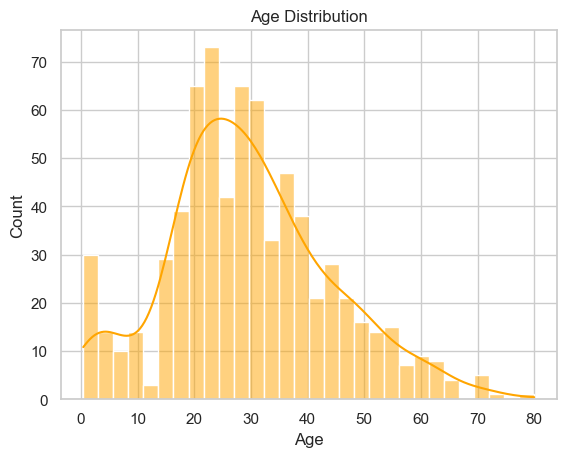

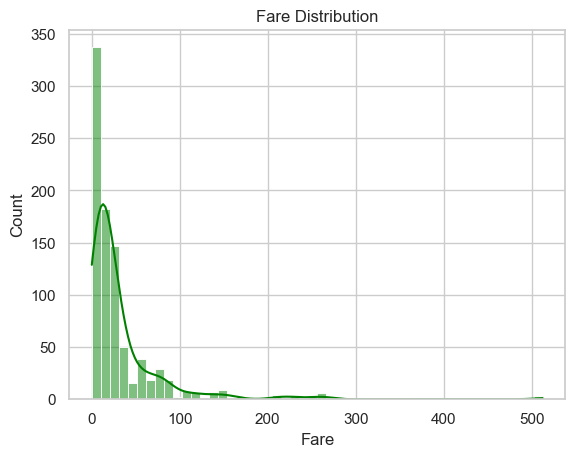

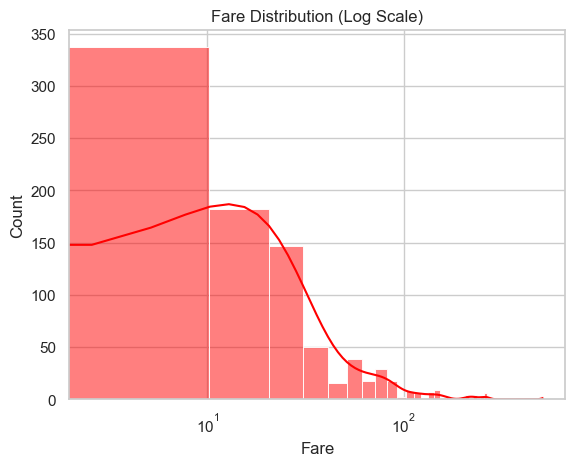

In [20]:
if 'Age' in df.columns:
    sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='orange')
    plt.title("Age Distribution")
    plt.show()

if 'Fare' in df.columns:
    sns.histplot(df['Fare'], bins=50, kde=True, color='green')
    plt.title("Fare Distribution")
    plt.show()

    sns.histplot(df['Fare'], bins=50, kde=True, color='red')
    plt.xscale('log')
    plt.title("Fare Distribution (Log Scale)")
    plt.show()


## Observations and Inferences

- Age is normally distributed, most passengers are aged 20–35.
- Fare has outliers and is highly skewed.
- Most passengers traveled alone.
- 'Survived' is binary but provides meaningful insights in pairplots and correlation.
